# REINFORCEMENT LEARNING WITH DEEP Q-LEARNING

## DEEP Q-LEARNING OVERVIEW

The logic of the Deep _Q-learning algorithm_ is very similar to _Q-learning_, but in this case, the policy or _Q-table_ is not learned directly through the _Q-function_. Instead, it is learned by a neural network.

A neural network is defined such that, given a state, it returns the best Q(s, a) value across all possible actions, selecting only those with the highest Q(s, a) values. The network consists of:

- **Input Layer**: Represents the necessary neurons to encode the agent's current state (In 2D grid example, x and y coordinates, so 2 neurons).
- **Output Layer**: Encodes the actions the agent can take in the environment (In 2D grid example, 4 actions: up, down, left, and right).
- **Intermediate Layers**: Determined based on the complexity of the system.

## SETUP

In [1]:
# import modules
import os
import sys
import pandas as pd
from copy import deepcopy

pd.set_option("display.max_columns", None)

# Add the parent directory (where "modules" is located) to the Python path
notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
sys.path.append(parent_dir)

from modules import environment_creation_functions as ecf
from modules import environment as env
from modules import deep_q_learner as dqlearn
from modules import deep_q_learning_env_agent_execution as dqae

## LOAD ENVIRONMENT

Initial state of the agent is represented in green color, the final or destination state in red and barrier in black.

Creating maze
Grid of: 4 x 4
Barriers count: 4
Source: (2, 0)
Destination: (1, 3)
Failed to find the destination cell
Creating maze
Grid of: 5 x 5
Barriers count: 6
Source: (4, 0)
Destination: (2, 4)
Path to destination found.


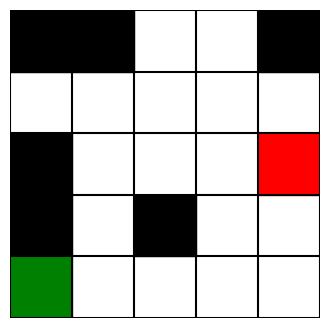

In [4]:
# create environment
dim, grid_matrix_positions, barriers, src, dest, reward_matrix  = ecf.create_environment(False, 4, 6) 
environment = env.Environment(reward_matrix, list(src), list(dest)) # convert states from tuple into list

# visualize created environment
%matplotlib inline
ecf.visualize_environment(dim, barriers, src, dest)

## DEEP Q-LEARNING ALGORITHM

### LEARNING PROCESS

The learning process in the Deep Q-learning algorithm does not occur per action, as it does in the `Q-learning` or `SARSA` algorithms. Instead, it occurs over entire episodes, where the algorithm takes actions and stores them in memory. This memory is called `Experience Replay`, and for each action, it records:

- the **current state**,
- the **action taken**,
- the **reward** obtained,
- the **next state**, and
- whether or not **it is a terminal state**.

Once the memory is filled, a set of actions is selected (i.e.: randomly), and a model is trained to adjust the weights, allowing the network to learn from each action.

- Algorithm pseudocode:

   ```
   # Initialize Memory (Experience Replay) : Current State | Taken Action | Reward | Next State | Is final state?
   # Set memory size i.e. mem_size = 200
   # Neuronal Network initialization
   For each episode do:
        s = initial state
        actions_per_episode = 0
        memory = empty
        while (s != not final) and (actions_per_episode < mem_size) do:
            a = Choose action. Cases:
                - random(action) if random() >= exploration_rate 
                - Predict (Neuronal network): Q_predict = max_a Q(St,a)  if random() < exploration_rate  
            Execute action a           
            R(S_t, a) = reward
            S_t = S_t+1 # New state
            save_in_memory = S_t, a, R(S_t, a), S_t+1, is_final_state?
        batch = select actions from memory (randomly)
        for each element in batch do:
            Predict (Neuronal network) = Q_predict(S_t, a)            
            Q_obj(S_t, a) =  R(S_t, a)  + (gamma . max_a'Q(S_t+1_, a'))     
            Train Neuronal Netwok (X= S_t, Y = Q_obj(S_t, a), loss = MSE) 
                Loss => 1/2 Sum(TD(S_t,a)^2) # temporal difference error
        end
    end
    ```

In [5]:
# Apply agent deep q-learning and print results
dqae.agent_deep_q_learning(learner=dqlearn.DeepQLearner,                           
                           environment = deepcopy(environment),  # Agent same environment.
                           num_episodes=100, # Note: adjust if grid is greater.
                           # Near 0: move to the next most rewarding state. Near 1:with a view to maximizing the final reward
                           discount_factor=0.1, 
                           # Aim to obtain 95% explotation, during the learning process is adjusted.
                           # Starts from exploration and gradually goes to explotation.
                           explotation_ratio=0.95, # Greedy control
                           max_steps= 500, 
                           verbose=True)

Iterating through episodes. Evolution prints will appear every 10 episodes.
	EPISODE 1 - Actions: 236 - Reward: -7238.0
	EPISODE 2 - Actions: 15 - Reward: -144.0
	EPISODE 3 - Actions: 49 - Reward: -1320.0
	EPISODE 4 - Actions: 90 - Reward: -2412.0
	EPISODE 5 - Actions: 45 - Reward: -1252.0
	EPISODE 6 - Actions: 22 - Reward: -732.0
	EPISODE 7 - Actions: 149 - Reward: -6680.0
	EPISODE 8 - Actions: 41 - Reward: -1724.0
	EPISODE 9 - Actions: 40 - Reward: -1716.0
	EPISODE 10 - Actions: 155 - Reward: -6272.0
CTRL POINT: 1
New expl.ratio: 0.47. Best reward now: -144.0. Best n_step now: 15
	EPISODE 11 - Actions: 14 - Reward: -124.0
	EPISODE 12 - Actions: 91 - Reward: -5884.0
	EPISODE 13 - Actions: 47 - Reward: -1504.0
	EPISODE 14 - Actions: 17 - Reward: -548.0
	EPISODE 15 - Actions: 186 - Reward: -6892.0
	EPISODE 16 - Actions: 159 - Reward: -6880.0
	EPISODE 17 - Actions: 14 - Reward: -244.0
	EPISODE 18 - Actions: 78 - Reward: -2160.0
	EPISODE 19 - Actions: 29 - Reward: -804.0
	EPISODE 20 - Act